<a href="https://colab.research.google.com/github/MustofAhmed41/Exercise-Pattern-Prediction/blob/master/PR_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


In [5]:
df = pd.read_csv('exercise_full_dataset_copy.csv').reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.rename(columns={'skewness_roll_belt.1':'skewness_pitch_belt'}, inplace=True)

In [7]:
df.drop('cvtd_timestamp', axis = 1, inplace=True)

In [8]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

int64
int64


In [9]:
df['raw_timestamp_part_1'] = df['raw_timestamp_part_1'].astype(str)
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].astype(str)

In [10]:
def concatenate_zero(val):
  if len(val) <6:
    return val + '0'
  else:
    return val

In [11]:
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].apply(concatenate_zero)

In [12]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

object
object


In [14]:
df["Converted Time"]= df["raw_timestamp_part_1"].str.cat(df['raw_timestamp_part_2'])

In [15]:
import datetime

def convert_unix_epoch(epoch_time):
  epoch_time = int(epoch_time)
  dt = datetime.datetime.fromtimestamp(epoch_time/1000000)
  return dt.strftime("%Y-%m-%d %H:%M:%S.%f %p")+'';

In [16]:
convert_unix_epoch(1322489729170626)

'2011-11-28 14:15:29.170626 PM'

In [17]:
df['Converted Time'] = df['Converted Time'].apply(convert_unix_epoch)

In [18]:
df['Converted Time'].iloc[90:100]

90    2011-12-05 11:23:55.600300 AM
91    2011-12-05 11:23:55.620290 AM
92    2011-12-05 11:23:55.672360 AM
93    2011-12-05 11:23:55.692314 AM
94    2011-12-05 11:23:55.692355 AM
95    2011-12-05 11:23:55.732320 AM
96    2011-12-05 11:23:55.740299 AM
97    2011-12-05 11:23:55.812306 AM
98    2011-12-05 11:23:55.816365 AM
99    2011-12-05 11:23:55.908319 AM
Name: Converted Time, dtype: object

In [19]:
def extract_miliseconds(val):
    val = str(val)
    return val[17:26]

In [20]:
df['Converted Seconds'] = df['Converted Time'].apply(extract_miliseconds)

In [21]:
df['Converted Seconds'].iloc[10:20]

10    52.500302
11    52.528316
12    52.560359
13    52.576390
14    52.604281
15    52.644302
16    52.692324
17    52.732306
18    52.740353
19    52.788335
Name: Converted Seconds, dtype: object

In [26]:
df1 = df.copy()

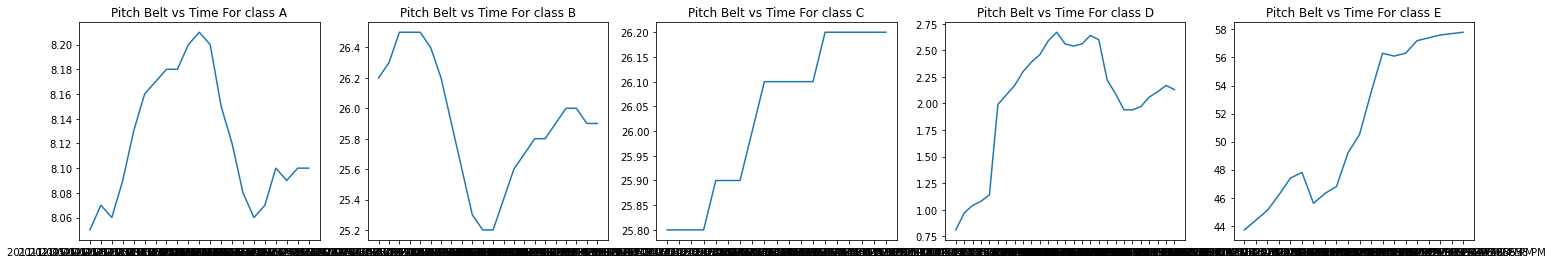

In [27]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

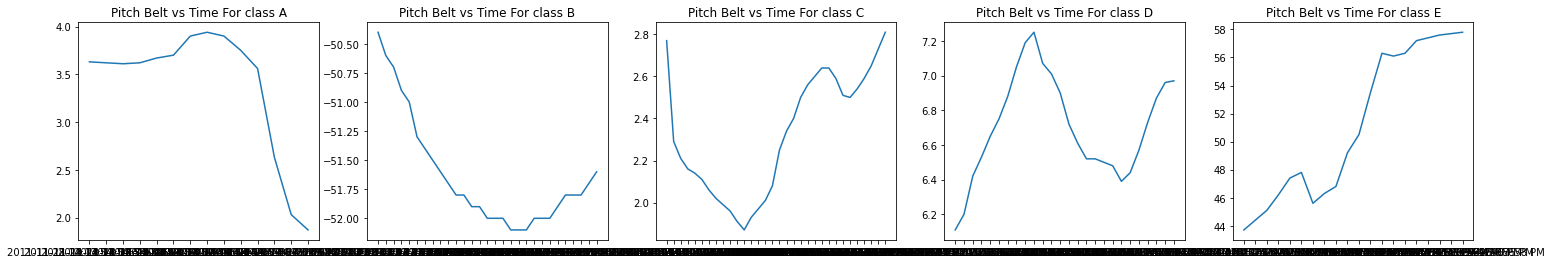

In [28]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 394, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

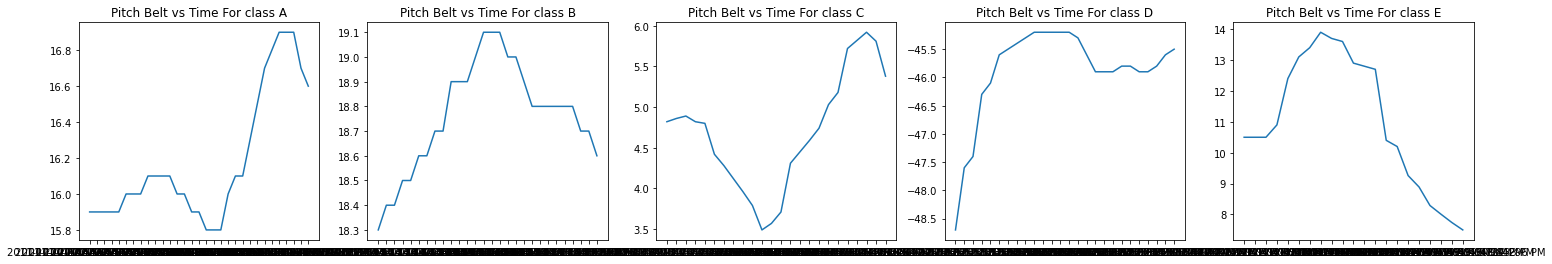

In [29]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

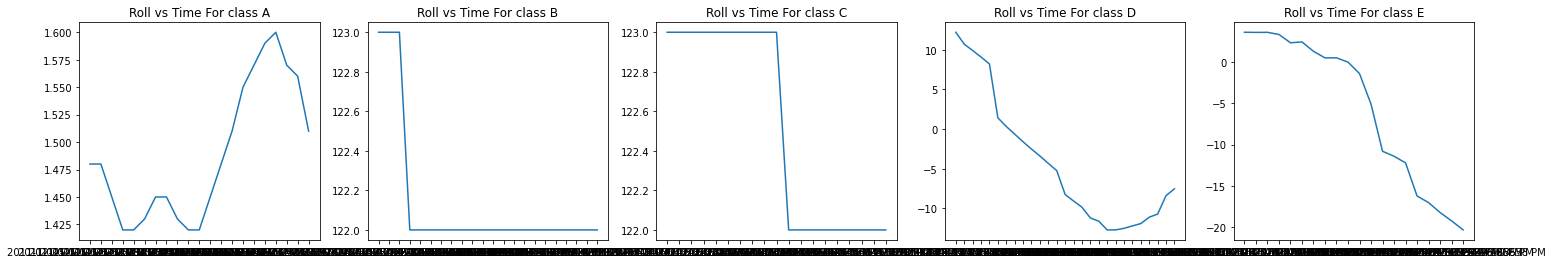

In [30]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

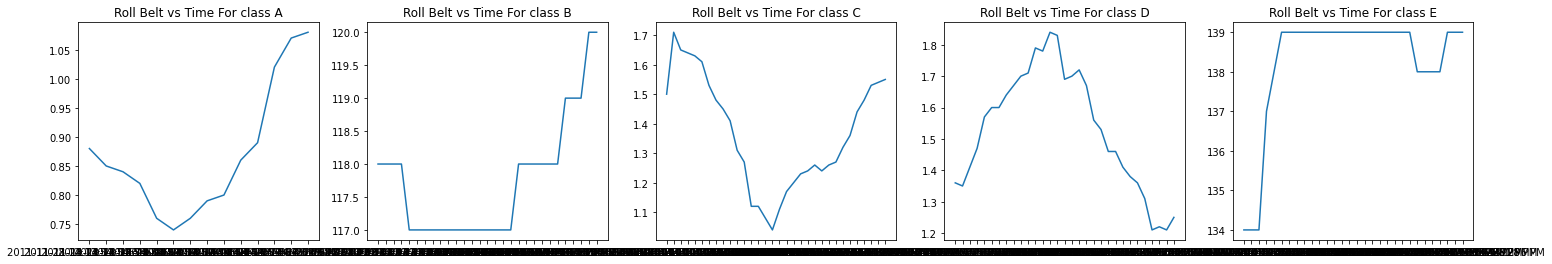

In [31]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 396, 821]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

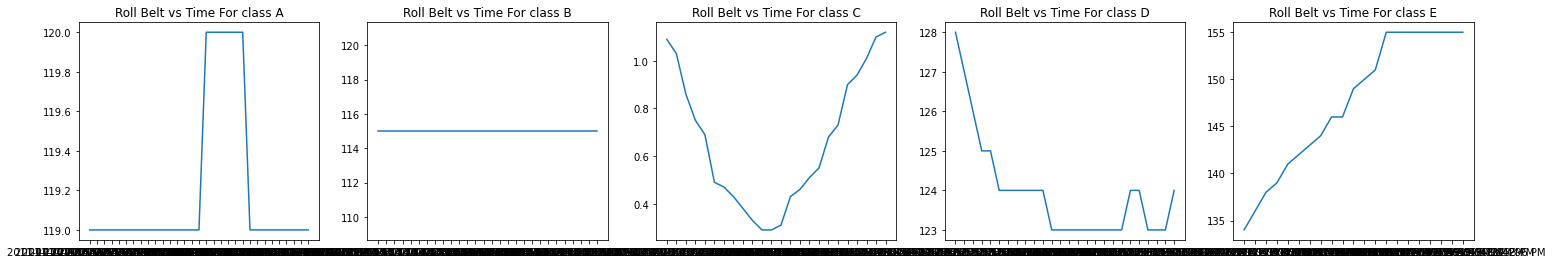

In [32]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

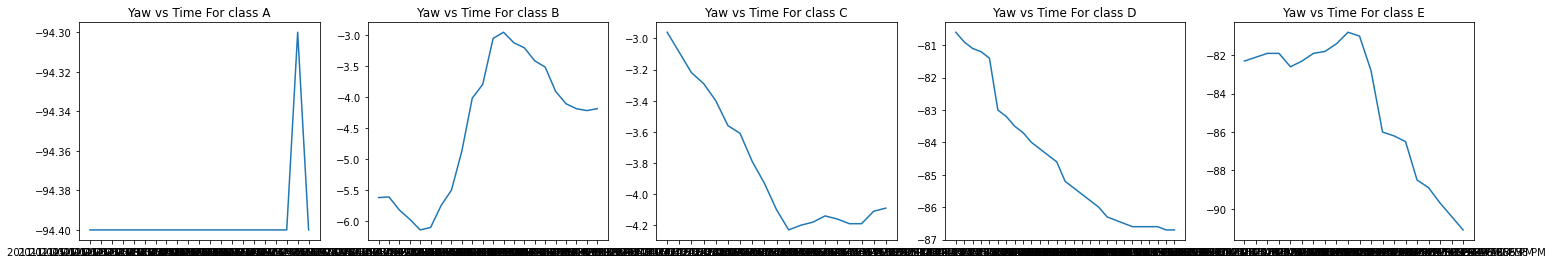

In [33]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

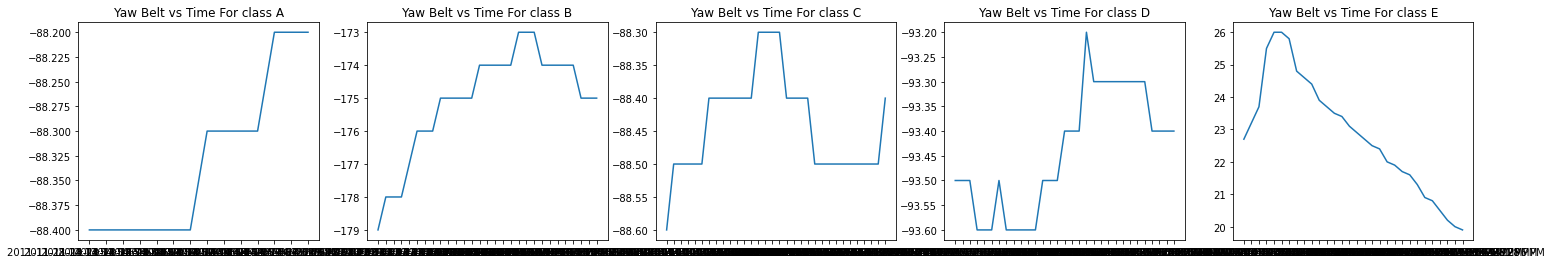

In [34]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 535, 266, 396, 821]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

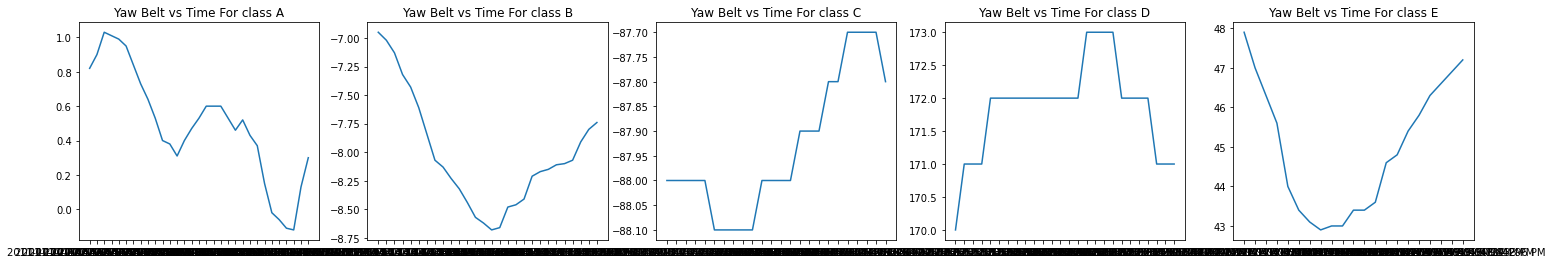

In [35]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 690, 465, 605, 156]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

In [87]:
df = pd.read_excel('exercise_full_dataset.xlsx').reset_index(drop=True)

In [88]:
len(df)

39242

In [89]:
df.head(3)

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1.322490e+09,34670.0,28/11/2011 14:15,no,1.0,3.70,41.6,-82.8,3.0,...,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,eurico,1.322490e+09,62641.0,28/11/2011 14:15,no,1.0,3.66,42.8,-82.5,2.0,...,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,eurico,1.322490e+09,70653.0,28/11/2011 14:15,no,1.0,3.58,43.7,-82.3,1.0,...,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39242 entries, 0 to 39241
Columns: 159 entries, user_name to classe
dtypes: float64(155), object(4)
memory usage: 47.6+ MB


In [91]:
df.describe()

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,3.924200e+04,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,807.000000,767.000000,0.0,...,839.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000
mean,1.322827e+09,500708.627465,432.322282,64.928120,0.423624,-10.827983,11.378982,-0.181088,4.533324,NaN,...,4702.779079,0.146381,0.095838,0.147643,-63.954814,162.981005,-55.494751,-316.640326,379.762296,395.010309
std,2.040334e+05,288682.935235,247.966725,62.672987,22.400539,94.982455,7.732219,3.739289,11.328069,NaN,...,7224.874200,1.827178,3.735124,1.337704,180.940999,199.580505,137.692832,345.893844,507.055260,368.098954
min,1.322490e+09,280.000000,1.000000,-28.900000,-56.200000,-180.000000,0.000000,-3.333333,-2.210526,NaN,...,0.000000,-339.000000,-7.030000,-52.000000,-498.000000,-690.000000,-458.000000,-1280.000000,-906.000000,-973.000000
25%,1.322673e+09,252299.500000,222.000000,1.100000,1.830000,-88.200000,3.000000,-1.346611,-1.079763,NaN,...,0.251195,-0.220000,-1.450000,-0.180000,-181.000000,53.000000,-181.000000,-620.000000,8.000000,200.000000
50%,1.322833e+09,498781.500000,428.000000,114.000000,5.320000,-11.900000,17.000000,-0.907946,-0.021887,NaN,...,606.510220,0.050000,0.030000,0.080000,-58.000000,200.000000,-40.500000,-385.000000,588.000000,512.000000
75%,1.323084e+09,752287.750000,647.000000,123.000000,15.500000,12.500000,18.000000,-0.282445,4.148419,NaN,...,7648.713645,0.560000,1.650000,0.490000,74.000000,312.000000,25.000000,-77.000000,736.000000,652.000000
max,1.323095e+09,999091.000000,864.000000,162.000000,60.300000,180.000000,30.000000,50.979819,71.000000,NaN,...,39009.333330,4.770000,516.000000,231.000000,479.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [92]:
df.classe.value_counts()

A    11159
B     7593
E     7214
C     6844
D     6432
Name: classe, dtype: int64

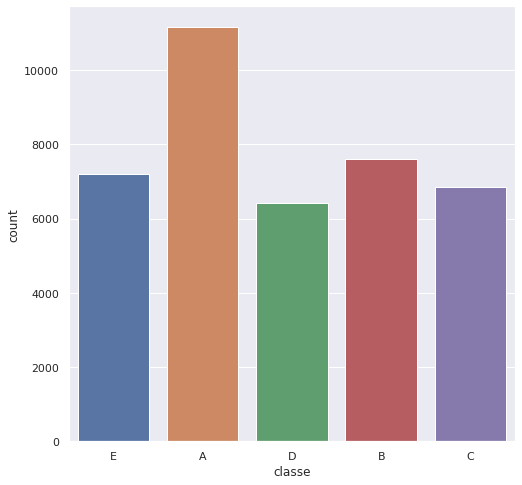

In [93]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="classe", data=df)

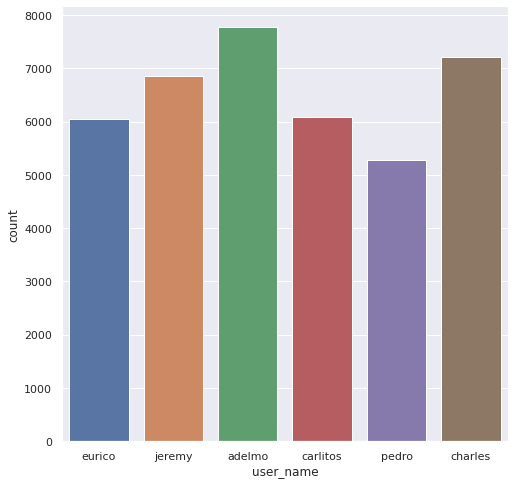

In [94]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="user_name", data=df)

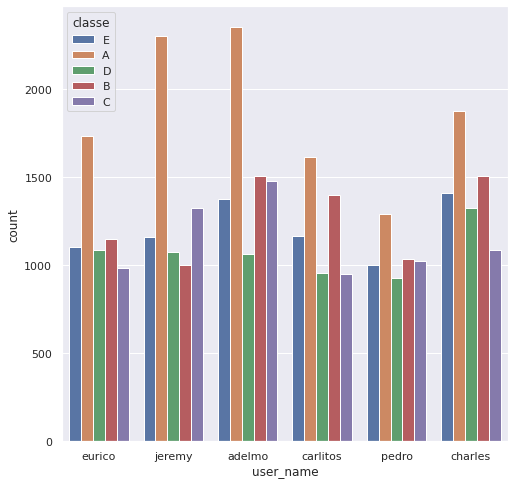

In [95]:
sns.set(rc={'figure.figsize':(8,8)})

sns.countplot(x="user_name", hue='classe', data=df)

In [96]:
df.rename(columns={'skewness_roll_belt.1':'skewness_pitch_belt'}, inplace=True)

In [97]:
print(df['kurtosis_roll_belt'].nunique())
print(df['num_window'].nunique())
print('Number of Empty Values : ', df['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df['num_window'].isnull().sum(axis = 0))

791
861
Number of Empty Values :  38435
Number of Empty Values :  0


In [98]:

print('Column Name', '  No of Missing Values')
for i in zip(df.columns, df.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
cvtd_timestamp 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 38435
kurtosis_picth_belt 		 38475
kurtosis_yaw_belt 		 39242
skewness_roll_belt 		 38434
skewness_pitch_belt 		 38475
skewness_yaw_belt 		 39242
max_roll_belt 		 38403
max_picth_belt 		 38403
max_yaw_belt 		 38435
min_roll_belt 		 38403
min_pitch_belt 		 38403
min_yaw_belt 		 38435
amplitude_roll_belt 		 38403
amplitude_pitch_belt 		 38403
amplitude_yaw_belt 		 38435
var_total_accel_belt 		 38403
avg_roll_belt 		 38402
stddev_roll_belt 		 38403
var_roll_belt 		 38403
avg_pitch_belt 		 38403
stddev_pitch_belt 		 38403
var_pitch_belt 		 38403
avg_yaw_belt 		 38403
stddev_yaw_belt 		 38403
var_yaw_belt 		 38403
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y

In [99]:
len(df)

39242

In [101]:
empty_max_cols = ['max_roll_belt', 'max_picth_belt',  'max_yaw_belt', 
            'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 
            'max_roll_dumbbell', 'max_picth_dumbbell', 'max_yaw_dumbbell',
            'max_roll_forearm', 'max_picth_forearm', 'max_yaw_forearm'
            ]

empty_min_cols = ['min_roll_belt', 'min_pitch_belt',  'min_yaw_belt', 
            'min_roll_arm', 'min_pitch_arm', 'min_yaw_arm', 
            'min_roll_dumbbell', 'min_pitch_dumbbell', 'min_yaw_dumbbell',
            'min_roll_forearm', 'min_pitch_forearm', 'min_yaw_forearm'
            ]

empty_avg_cols = ['avg_roll_belt', 'avg_pitch_belt',  'avg_yaw_belt', 
            'avg_roll_arm', 'avg_pitch_arm', 'avg_yaw_arm', 
            'avg_roll_dumbbell', 'avg_pitch_dumbbell', 'avg_yaw_dumbbell',
            'avg_roll_forearm', 'avg_pitch_forearm', 'avg_yaw_forearm'
            ]

empty_var_cols = ['var_roll_belt', 'var_pitch_belt',  'var_yaw_belt', 
            'var_roll_arm', 'var_pitch_arm', 'var_yaw_arm', 
            'var_roll_dumbbell', 'var_pitch_dumbbell', 'var_yaw_dumbbell',
            'var_roll_forearm', 'var_pitch_forearm', 'var_yaw_forearm'
            ]

empty_std_cols = ['stddev_roll_belt', 'stddev_pitch_belt',  'stddev_yaw_belt', 
            'stddev_roll_arm', 'stddev_pitch_arm', 'stddev_yaw_arm', 
            'stddev_roll_dumbbell', 'stddev_pitch_dumbbell', 'stddev_yaw_dumbbell',
            'stddev_roll_forearm', 'stddev_pitch_forearm', 'stddev_yaw_forearm'
            ]

empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_pitch_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_pitch_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_pitch_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_pitch_forearm', 'kurtosis_yaw_forearm'
            ]   


empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_picth_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_picth_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm'
            ]

empty_skew_cols = ['skewness_roll_belt', 'skewness_pitch_belt',  'skewness_yaw_belt', 
            'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm', 
            'skewness_roll_dumbbell', 'skewness_pitch_dumbbell', 'skewness_yaw_dumbbell',
            'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm'
            ]

empty_amplitude_cols = ['amplitude_roll_belt', 'amplitude_pitch_belt',  'amplitude_yaw_belt', 
            'amplitude_roll_arm', 'amplitude_pitch_arm', 'amplitude_yaw_arm', 
            'amplitude_roll_dumbbell', 'amplitude_pitch_dumbbell', 'amplitude_yaw_dumbbell',
            'amplitude_roll_forearm', 'amplitude_pitch_forearm', 'amplitude_yaw_forearm'
            ]   

empty_acceleration_cols = ['var_total_accel_belt', 'var_accel_arm',  'var_accel_dumbbell',
                           'var_accel_forearm']

attributes = [
              'roll_belt','pitch_belt','yaw_belt',
              'roll_arm', 'pitch_arm', 'yaw_arm',
              'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
              'roll_forearm', 'pitch_forearm', 'yaw_forearm',
              ]

attributes2 = ['total_accel_belt',  'total_accel_arm', 'total_accel_dumbbell', 
               'total_accel_forearm']

In [102]:
df2 = df.copy()

In [103]:
len(df2)

39242

In [104]:

for j in zip(empty_max_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    max_val = df2[(df2['num_window'] == i)][j[1]].max()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = max_val

In [105]:
for j in zip(empty_min_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    min_val = df2[(df2['num_window'] == i)][j[1]].min()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = min_val

In [106]:
for j in zip(empty_avg_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    mean_val = df2[(df2['num_window'] == i)][j[1]].mean()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = mean_val

In [107]:
for j in zip(empty_var_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    var_val = df2[(df2['num_window'] == i)][j[1]].var()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = var_val

In [108]:
for j in zip(empty_std_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].std()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [109]:
for j in zip(empty_kurtosis_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].kurtosis()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [110]:
for j in zip(empty_skew_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].skew()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [111]:
for j in zip(empty_amplitude_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val1 = df2[(df2['num_window'] == i)][j[1]].max()
    val2 = df2[(df2['num_window'] == i)][j[1]].min()
    val = abs(val1 - val2)
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = val

In [112]:
for j in zip(empty_acceleration_cols, attributes2):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val = df2[(df2['num_window'] == i)][j[1]].var()    
    df2.loc[(df2['num_window'] == i),j[0]] = val

In [113]:
print(len(df2))

39242


In [114]:
print('Column Name', '  No of Missing Values\n')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values

user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
cvtd_timestamp 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 12
kurtosis_picth_belt 		 12
kurtosis_yaw_belt 		 12
skewness_roll_belt 		 6
skewness_pitch_belt 		 6
skewness_yaw_belt 		 6
max_roll_belt 		 0
max_picth_belt 		 0
max_yaw_belt 		 0
min_roll_belt 		 0
min_pitch_belt 		 0
min_yaw_belt 		 0
amplitude_roll_belt 		 0
amplitude_pitch_belt 		 0
amplitude_yaw_belt 		 0
var_total_accel_belt 		 2
avg_roll_belt 		 0
stddev_roll_belt 		 2
var_roll_belt 		 2
avg_pitch_belt 		 0
stddev_pitch_belt 		 2
var_pitch_belt 		 2
avg_yaw_belt 		 0
stddev_yaw_belt 		 2
var_yaw_belt 		 2
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_arm 		 0
total_accel_arm 		 0
var_acce

In [115]:
df2.dropna(axis=0, inplace=True)

In [116]:
print(len(df2))

39229


In [117]:
df2.to_csv('Preprocessed_Exercise_PR.csv')

In [204]:
df1 = pd.read_csv('Preprocessed_Exercise_PR.csv')

In [205]:
def impute_classe(x):
  if x == 'A':
    return 4
  elif x =='B':
    return 3
  elif x=='C':
    return 2
  elif x=='D':
    return 1
  elif x=='E':
    return 0

In [206]:
df1['classe'] = df1['classe'].apply(impute_classe)

In [207]:
df1.classe.value_counts()

4    11154
3     7589
0     7214
2     6844
1     6428
Name: classe, dtype: int64

In [208]:
del_cols = ['Unnamed: 0' ,'user_name' ,'raw_timestamp_part_1' ,'raw_timestamp_part_2' ,'cvtd_timestamp' ,'new_window' ,'num_window', 
            'roll_belt' ,'pitch_belt' ,'yaw_belt', 'roll_arm' ,'pitch_arm' ,'yaw_arm', 'roll_dumbbell' ,'pitch_dumbbell' ,'yaw_dumbbell',
            'roll_forearm' ,'pitch_forearm' ,'yaw_forearm', 'gyros_belt_x', 
            'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 
            'magnet_belt_y', 'magnet_belt_z', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 
            'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
            'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
            'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 
            'magnet_forearm_y', 'magnet_forearm_z']

In [209]:
df1.drop(del_cols,axis=1, inplace=True)

In [210]:
len(df1.columns)

105

In [211]:
count = 0
for i in df1.columns:
    print(count, i)
    count += 1

0 total_accel_belt
1 kurtosis_roll_belt
2 kurtosis_picth_belt
3 kurtosis_yaw_belt
4 skewness_roll_belt
5 skewness_pitch_belt
6 skewness_yaw_belt
7 max_roll_belt
8 max_picth_belt
9 max_yaw_belt
10 min_roll_belt
11 min_pitch_belt
12 min_yaw_belt
13 amplitude_roll_belt
14 amplitude_pitch_belt
15 amplitude_yaw_belt
16 var_total_accel_belt
17 avg_roll_belt
18 stddev_roll_belt
19 var_roll_belt
20 avg_pitch_belt
21 stddev_pitch_belt
22 var_pitch_belt
23 avg_yaw_belt
24 stddev_yaw_belt
25 var_yaw_belt
26 total_accel_arm
27 var_accel_arm
28 avg_roll_arm
29 stddev_roll_arm
30 var_roll_arm
31 avg_pitch_arm
32 stddev_pitch_arm
33 var_pitch_arm
34 avg_yaw_arm
35 stddev_yaw_arm
36 var_yaw_arm
37 kurtosis_roll_arm
38 kurtosis_picth_arm
39 kurtosis_yaw_arm
40 skewness_roll_arm
41 skewness_pitch_arm
42 skewness_yaw_arm
43 max_roll_arm
44 max_picth_arm
45 max_yaw_arm
46 min_roll_arm
47 min_pitch_arm
48 min_yaw_arm
49 amplitude_roll_arm
50 amplitude_pitch_arm
51 amplitude_yaw_arm
52 kurtosis_roll_dumbbel

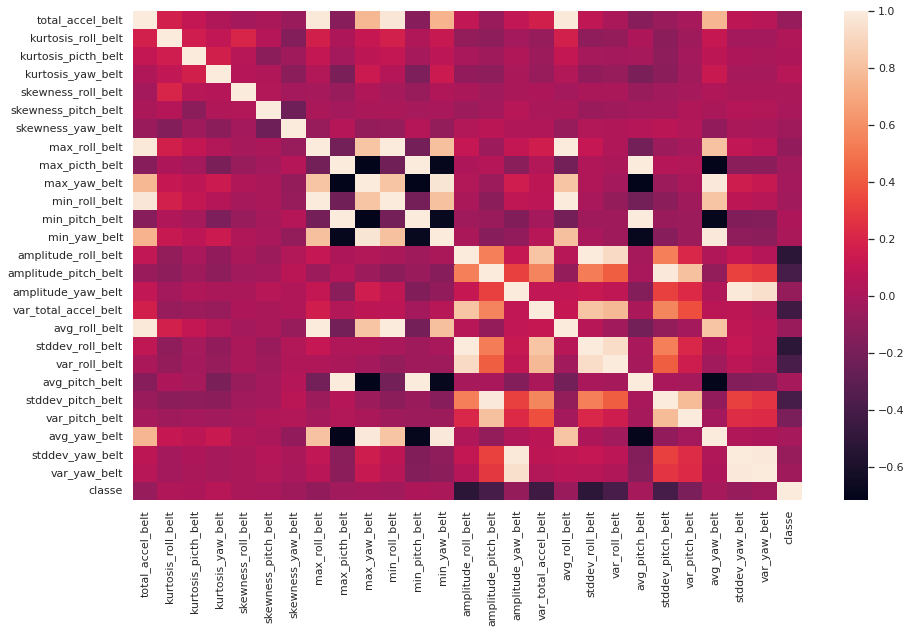

In [212]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[0:26])
lst.append('classe')
belt_corr = df1[lst].corr()
sns.heatmap(belt_corr)

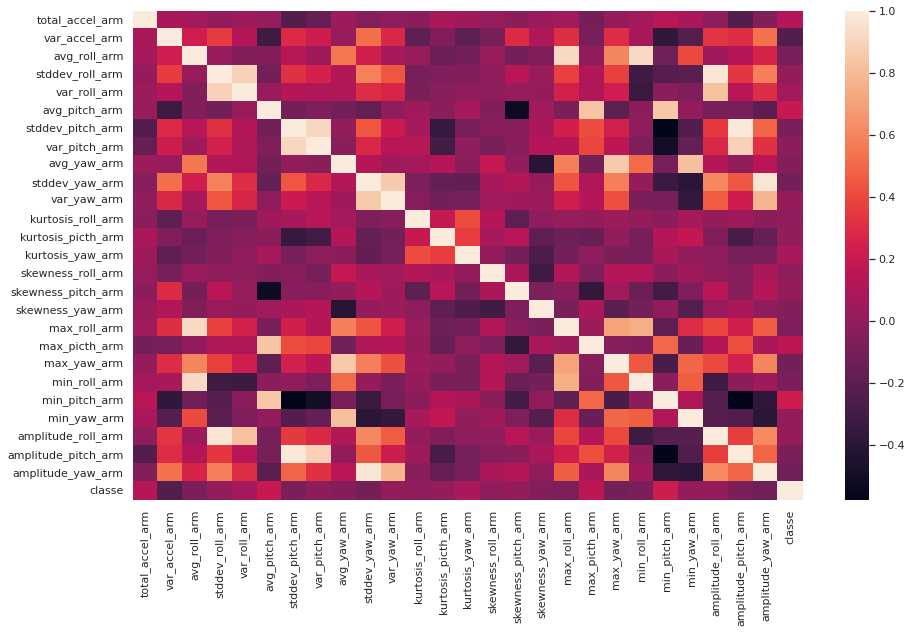

In [214]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[26:52])
lst.append('classe')
arm_corr = df1[lst].corr()
sns.heatmap(arm_corr)

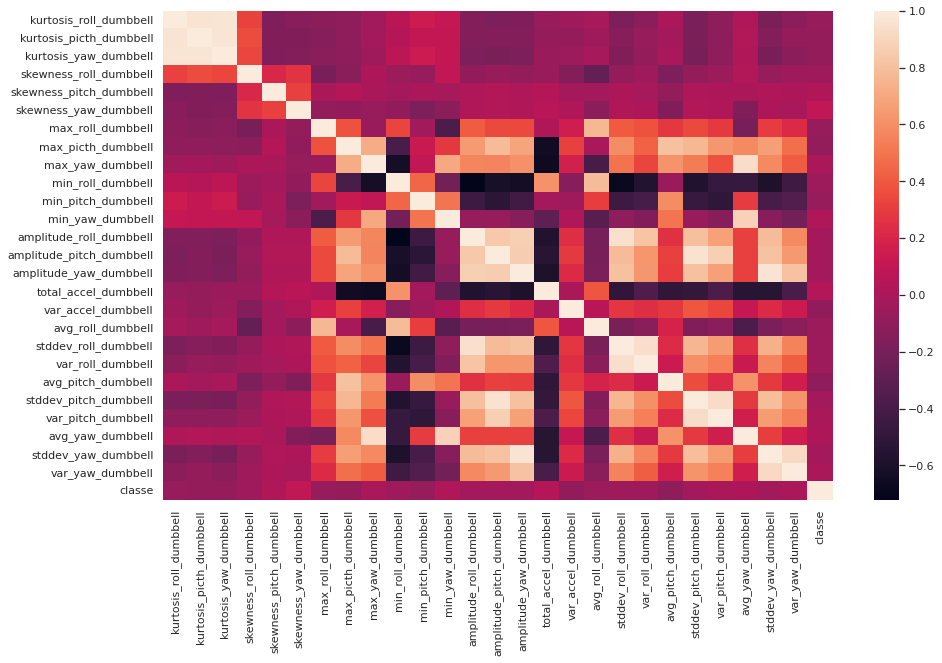

In [215]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[52:78])
lst.append('classe')
dumbell_corr = df1[lst].corr()
sns.heatmap(dumbell_corr)

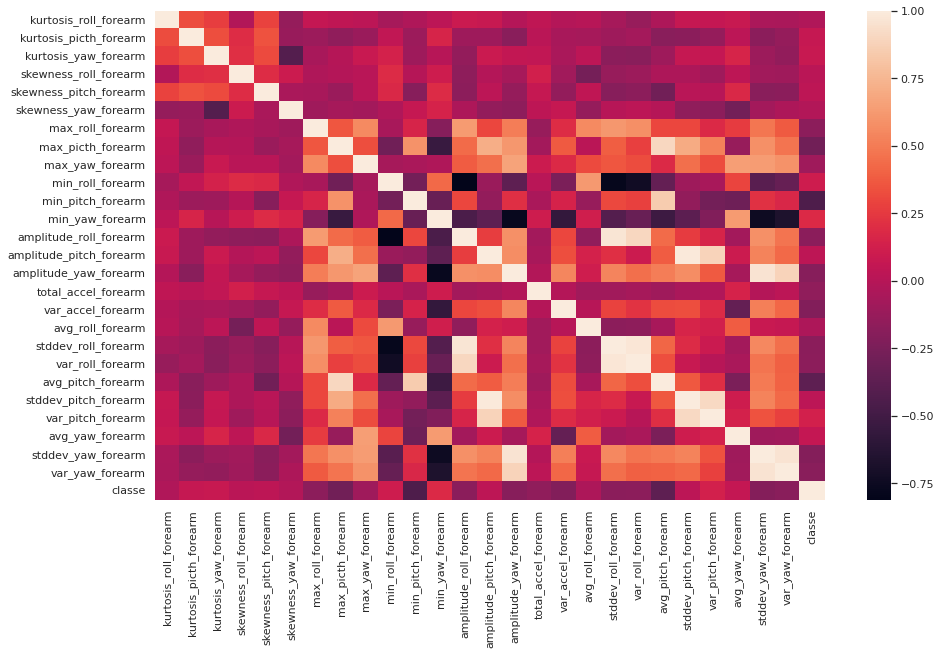

In [216]:
sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[78:104])
lst.append('classe')
forearm_corr = df1[lst].corr()
sns.heatmap(forearm_corr)

In [217]:
corr = [belt_corr, arm_corr, dumbell_corr, forearm_corr]

In [221]:
for i in corr:
    print(i[(i['classe'] < -0.1) ]['classe'])
    print()
    print(i[(i['classe'] > 0.1) ]['classe'])

amplitude_roll_belt    -0.522575
amplitude_pitch_belt   -0.400123
var_total_accel_belt   -0.431520
stddev_roll_belt       -0.512648
var_roll_belt          -0.389846
stddev_pitch_belt      -0.400522
var_pitch_belt         -0.185927
Name: classe, dtype: float64

classe    1.0
Name: classe, dtype: float64
var_accel_arm       -0.240781
stddev_yaw_arm      -0.108659
max_yaw_arm         -0.110026
amplitude_yaw_arm   -0.124778
Name: classe, dtype: float64

total_accel_arm    0.124040
avg_pitch_arm      0.195004
max_picth_arm      0.158434
min_pitch_arm      0.220749
classe             1.000000
Name: classe, dtype: float64
Series([], Name: classe, dtype: float64)

classe    1.0
Name: classe, dtype: float64
max_roll_forearm         -0.170681
max_picth_forearm        -0.284870
min_pitch_forearm        -0.440782
amplitude_roll_forearm   -0.178243
amplitude_yaw_forearm    -0.194529
total_accel_forearm      -0.160384
var_accel_forearm        -0.217235
stddev_roll_forearm      -0.180827
var_roll_for